# YouTube Subscriber Prediction

In [295]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor

In [296]:
data = pd.read_csv('youtube_data.csv')

In [297]:
print(len(data.index)) # no.rows
print(len(data.columns)) # no.columns

249
16


In [298]:
data.head(10)

,Video,Video title,Video publish time,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
0,7E7tl6rm7VM,100% Accuracy Mushroom Classification - Data E...,23-Aug-20,5,8,36,98.0,1,49,19.96,0:03:17,1429,78.3655,11.0,10910,8.67
1,-46XflOZewg,Bike Share Usage Prediction - Data Every Day #230,28-Mar-21,2,4,1,100.0,0,10,17.55,0:03:31,88,5.1650,0.0,1601,3.37
2,1OHk8urt60A,Tic-Tac-Toe Winner Classification - Data Every...,28-Dec-20,2,3,4,100.0,0,10,17.03,0:04:13,108,7.5958,0.0,2251,2.04
3,4lnUUZxeGBI,Health Insurance Interest Prediction - Data Ev...,17-Sep-20,2,3,6,100.0,0,6,16.01,0:04:21,297,21.5845,5.0,2674,6.28
4,9AnCNBL8c6Q,Age Prediction From Facial Images (CNN Regress...,27-Feb-21,2,5,3,100.0,0,14,20.11,0:04:53,266,21.6983,2.0,3014,5.14
5,9KpiDAmijSE,Predicting University Rankings - Data Every Da...,24-Aug-20,2,0,2,100.0,0,7,24.23,0:02:41,54,2.4239,2.0,1506,2.39
6,Ci7pju1gNUY,Using Pipeline for Preprocessing (Employee Ter...,18-Feb-21,2,4,0,100.0,0,16,24.26,0:07:53,139,18.3001,1.0,1797,3.73
7,D3yyRMI_RTA,Employee Burnout Prediction (Model Selection) ...,8-Mar-21,2,3,4,100.0,0,13,22.26,0:04:15,88,6.2566,1.0,1682,3.21
8,E_3-9sGq7jk,Fish Image Species Classification (Transfer Le...,11-Mar-21,2,8,4,100.0,0,20,11.83,0:03:47,256,16.2104,10.0,2091,4.69
9,FZCSe_Ve-f4,US Store Profit Prediction - Data Every Day #216,15-Mar-21,2,1,0,100.0,0,10,17.49,0:04:33,62,4.7164,1.0,1691,2.42


In [299]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Video                               249 non-null    object 
 1   Video title                         249 non-null    object 
 2   Video publish time                  249 non-null    object 
 3   End screen element clicks           249 non-null    int64  
 4   Comments added                      249 non-null    int64  
 5   Shares                              249 non-null    int64  
 6   Likes (vs. dislikes) (%)            249 non-null    float64
 7   Dislikes                            249 non-null    int64  
 8   Likes                               249 non-null    int64  
 9   Average percentage viewed (%)       249 non-null    float64
 10  Average view duration               249 non-null    object 
 11  Views                               249 non-n

In [300]:
data.describe()

,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Views,Watch time (hours),Subscribers,Impressions,Impressions click-through rate (%)
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,248.000000,249.000000,249.000000
mean,0.357430,2.293173,1.911647,99.676707,0.040161,8.441767,16.507590,141.803213,9.755215,2.254032,2284.469880,3.016185
std,0.693253,2.037549,3.561701,1.825534,0.196731,5.224556,5.460875,152.763276,9.524234,2.979686,1560.586343,1.542976
min,0.000000,0.000000,0.000000,83.330000,0.000000,2.000000,3.470000,10.000000,0.531100,0.000000,148.000000,0.700000
25%,0.000000,1.000000,0.000000,100.000000,0.000000,5.000000,12.810000,67.000000,4.340400,0.000000,1501.000000,1.960000
50%,0.000000,2.000000,1.000000,100.000000,0.000000,7.000000,16.010000,96.000000,6.555200,2.000000,1766.000000,2.710000
75%,1.000000,3.000000,2.000000,100.000000,0.000000,10.000000,19.830000,156.000000,12.099800,3.000000,2332.000000,3.590000
max,5.000000,9.000000,36.000000,100.000000,1.000000,49.000000,37.520000,1429.000000,78.365500,30.000000,10991.000000,8.670000


# PRE PROCESSING

In [301]:
def preprocess_inputs(df):
    df = df.copy()
    
    # Droping unused columns(video and video title)
    df = df.drop(['Video', 'Video title'], axis=1)
    
    # Drop row with missing target value
    missing_target_row = df[df['Subscribers'].isna()].index
    df = df.drop(missing_target_row, axis=0).reset_index(drop=True)
    
    # Extract date features
    df['Video publish time'] = pd.to_datetime(df['Video publish time'])
    df['Video month'] = df['Video publish time'].apply(lambda x: x.month) #separating the month
    df['Video day'] = df['Video publish time'].apply(lambda x: x.day) #separating the day
    df = df.drop('Video publish time', axis=1) #after extracting , droppping it
    
    # Convert durations to seconds
    df['Average view duration'] = pd.to_datetime(df['Average view duration']).apply(lambda x: (x.minute * 60) + x.second)
    
    # Split df into X and y
    df['Subscribers'] = df['Subscribers'].astype(int) #conveting into int datatype
    y = df['Subscribers'] #dependent variable
    
    X = df.drop('Subscribers', axis=1) #independent variables(removing dependant variable from independent variables)
    
    return X, y

In [302]:
X, y = preprocess_inputs(data)

In [303]:
X

,End screen element clicks,Comments added,Shares,Likes (vs. dislikes) (%),Dislikes,Likes,Average percentage viewed (%),Average view duration,Views,Watch time (hours),Impressions,Impressions click-through rate (%),Video month,Video day
0,5,8,36,98.0,1,49,19.96,197,1429,78.3655,10910,8.67,8,23
1,2,4,1,100.0,0,10,17.55,211,88,5.1650,1601,3.37,3,28
2,2,3,4,100.0,0,10,17.03,253,108,7.5958,2251,2.04,12,28
3,2,3,6,100.0,0,6,16.01,261,297,21.5845,2674,6.28,9,17
4,2,5,3,100.0,0,14,20.11,293,266,21.6983,3014,5.14,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,0,0,4,100.0,0,5,12.53,369,146,14.9656,2146,3.22,1,22
244,0,3,0,100.0,0,2,16.32,265,58,4.2834,1693,1.83,11,6
245,0,3,7,100.0,0,13,12.60,298,251,20.8134,5775,2.37,12,14
246,0,2,5,100.0,0,12,14.26,207,263,15.1233,3298,5.12,8,26


In [304]:
y

0      11
1       0
2       0
3       5
4       2
       ..
243     3
244     3
245     2
246     4
247     3
Name: Subscribers, Length: 248, dtype: int32

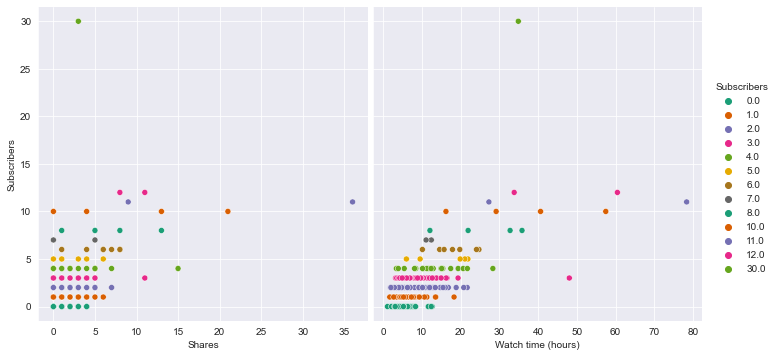

In [305]:
sns.pairplot(data,x_vars=['Shares','Watch time (hours)'],y_vars='Subscribers',height=5,aspect=1,hue ='Subscribers',palette='Dark2')

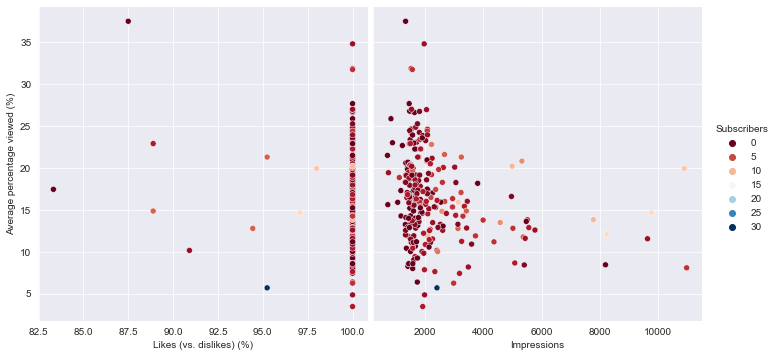

In [306]:
sns.pairplot(data,x_vars=['Likes (vs. dislikes) (%)','Impressions'],y_vars='Average percentage viewed (%)',height=5,aspect=1,hue ='Subscribers',palette='RdBu')

#   TRAINING / VALIDATION

In [307]:
rmses = []
r2s = []

kf = KFold(n_splits=3)

for train_idx, test_idx in kf.split(X):
    X_train = X.iloc[train_idx, :]
    X_test = X.iloc[test_idx, :]
    y_train = y.iloc[train_idx]
    y_test = y.iloc[test_idx]
    
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    rmse = np.sqrt(np.mean((y_test - y_pred)**2)) #root mean square error
    rmses.append(rmse)
    
    r2 = 1 - (np.sum((y_test - y_pred)**2) / np.sum((y_test - y_test.mean())**2))
    r2s.append(r2)


## RESULTS

In [308]:
print("     RMSE: {:.2f}".format(np.mean(rmses)))
print("R^2 Score: {:.5f}".format(np.mean(r2s)))

     RMSE: 2.07
R^2 Score: 0.47895


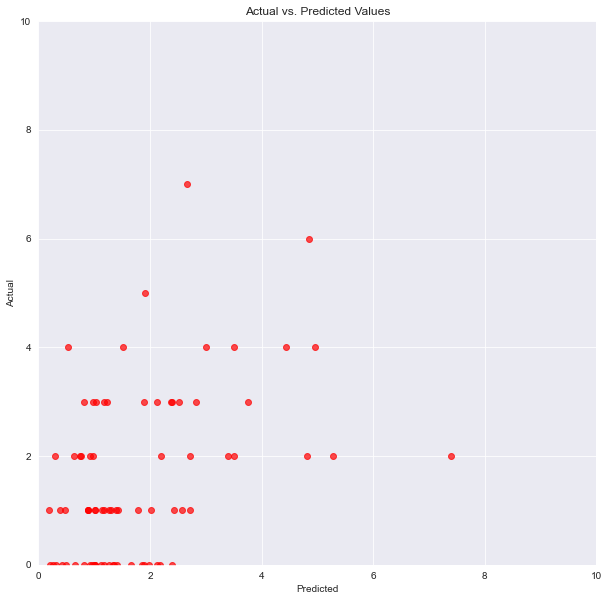

In [309]:
plt.figure(figsize=(10, 10))
plt.scatter(x=y_pred, y=y_test,color='red',alpha=0.7)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.title("Actual vs. Predicted Values")
plt.show()